In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fertilizer_data_path = 'C:/Users/PREETI/Desktop/data/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [4]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.5
1,3,maize,80,40,20,5.5
2,5,chickpea,40,60,80,5.5
3,12,kidneybeans,20,60,20,5.5
4,13,pigeonpeas,20,60,20,5.5


In [5]:
del merge_fert['Unnamed: 0']

In [6]:
merge_fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [7]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

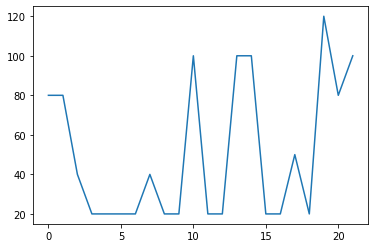

In [8]:
plt.plot(merge_fert["N"])

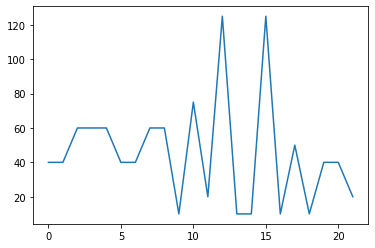

In [9]:
plt.plot(merge_fert["P"])

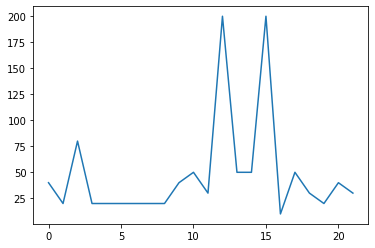

In [10]:
plt.plot(merge_fert["K"])

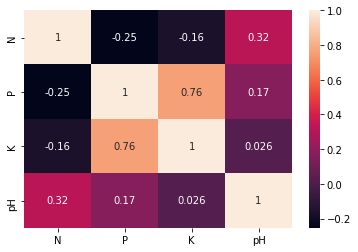

In [11]:
sns.heatmap(merge_fert.corr(),annot=True)

In [15]:
merge_crop = pd.read_csv('C:/Users/PREETI/Desktop/data/MergeFileCrop.csv')
reco_fert = merge_fert

In [16]:
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

In [17]:
temp

,N,P,K
0,82,36,37
1,74,60,41
2,97,55,37
3,64,40,36
4,89,39,42
...,...,...,...
2195,94,29,28
2196,93,26,25
2197,91,39,32
2198,89,23,34


In [18]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [19]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,82,36,37
1,1,21.770462,80.319644,7.038096,226.655537,rice,74,60,41
2,2,23.004459,82.320763,7.840207,263.964248,rice,97,55,37
3,3,26.491096,80.158363,6.980401,242.864034,rice,64,40,36
4,4,20.130175,81.604873,7.628473,262.717340,rice,89,39,42
...,...,...,...,...,...,...,...,...,...
2195,895,26.774637,66.413269,6.780064,177.774507,coffee,94,29,28
2196,896,27.417112,56.636362,6.086922,127.924610,coffee,93,26,25
2197,897,24.131797,67.225123,6.362608,173.322839,coffee,91,39,32
2198,898,26.272418,52.127394,6.758793,127.175293,coffee,89,23,34


In [20]:
del merge_crop['Unnamed: 0']

In [21]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,82,36,37
1,21.770462,80.319644,7.038096,226.655537,rice,74,60,41
2,23.004459,82.320763,7.840207,263.964248,rice,97,55,37
3,26.491096,80.158363,6.980401,242.864034,rice,64,40,36
4,20.130175,81.604873,7.628473,262.717340,rice,89,39,42
...,...,...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,coffee,94,29,28
2196,27.417112,56.636362,6.086922,127.924610,coffee,93,26,25
2197,24.131797,67.225123,6.362608,173.322839,coffee,91,39,32
2198,26.272418,52.127394,6.758793,127.175293,coffee,89,23,34


In [22]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [23]:
merge_crop.to_csv("C:/Users/PREETI/Desktop/data/model_recommendation.csv",index=False)

In [24]:
df = pd.read_csv('C:/Users/PREETI/Desktop/data/model_recommendation.csv')

In [25]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,82,36,37,20.879744,82.002744,6.502985,202.935536,rice
1,74,60,41,21.770462,80.319644,7.038096,226.655537,rice
2,97,55,37,23.004459,82.320763,7.840207,263.964248,rice
3,64,40,36,26.491096,80.158363,6.980401,242.864034,rice
4,89,39,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:
df.shape

(2200, 8)

In [27]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [28]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [29]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [30]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [31]:
df['label'].value_counts()

banana         100
kidneybeans    100
lentil         100
apple          100
jute           100
pigeonpeas     100
maize          100
orange         100
muskmelon      100
watermelon     100
mothbeans      100
mango          100
grapes         100
papaya         100
coconut        100
pomegranate    100
blackgram      100
cotton         100
chickpea       100
mungbean       100
rice           100
coffee         100
Name: label, dtype: int64

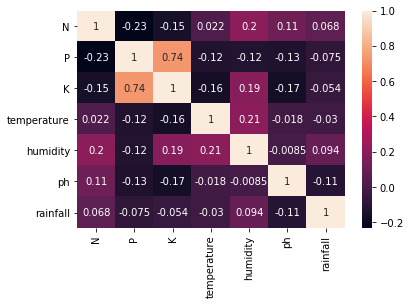

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [34]:
acc = []
model = []

In [35]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [36]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.72      1.00      0.84        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      0.08      0.14        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [39]:
score

array([0.93181818, 0.92727273, 0.85227273, 0.85909091, 0.87272727])

In [41]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'C:/Users/PREETI/Desktop/dataDecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [42]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [43]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99318182, 0.98863636, 0.98863636])

In [45]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'C:/Users/PREETI/Desktop/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [46]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.1409090909090909
              precision    recall  f1-score   support

       apple       1.00      0.69      0.82        13
      banana       1.00      0.06      0.11        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.25      0.40        20
      grapes       1.00      0.11      0.20        18
        jute       0.00      0.00      0.00        28
 kidneybeans       0.04      1.00      0.07        14
      lentil       1.00      0.04      0.08        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.17      0.29        24
   muskmelon       1.00      0.43      0.61        23
      orange       0.00      0.00      0.0

In [47]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.26363636, 0.25909091, 0.28409091, 0.27727273, 0.27045455])

In [48]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.94      0.85      0.89        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      0.96      0.89        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      0.96      0.94        23
       maize       0.86      0.90      0.88        21
       mango       0.93      1.00      0.96        26
   mothbeans       0.94      0.79      0.86        19
    mungbean       0.96      0.96      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [49]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95681818, 0.96590909, 0.96136364, 0.95454545, 0.95681818])

In [50]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'C:/Users/PREETI/Desktop/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [51]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [52]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99545455, 0.99318182, 0.99318182, 0.98863636])

In [53]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:/Users/PREETI/Desktop/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [54]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.89      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [55]:
score = cross_val_score(XB,features,target,cv=5)
score

array([0.97727273, 0.99318182, 0.98863636, 0.98409091, 0.98636364])

In [56]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'C:/Users/PREETI/Desktop/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

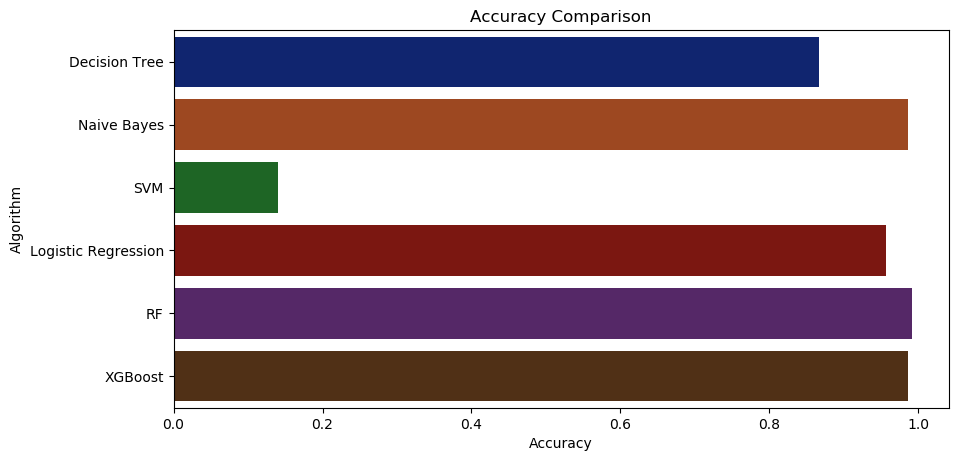

In [57]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [58]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.865909090909091
Naive Bayes --> 0.9863636363636363
SVM --> 0.1409090909090909
Logistic Regression --> 0.9568181818181818
RF --> 0.990909090909091
XGBoost --> 0.9863636363636363


In [59]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [60]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [1]:
!pip install -U ibm-watson-machine-learning

  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=9fc8285b5cd2235ab11ed22e66d54e61705b710e0b7c35e32132410ed56df1bb
  Stored in directory: c:\users\preeti\appdata\local\pip\cache\wheels\47\22\bf\e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501004 sha256=d4f960f1a0995e6ddc6cd681378ae9186b1d1d48149a47dec7e0fa8502c36357
  Stored in directory: c:\users\preeti\appdata\local\pip\cache\wheels\6c\a2\e4\c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.7.0-py2.py3-none-any.whl size=88607 sha256=79efd1f544e932d081c7231f297915b475dda1a4c7784127ad68b3885e04966b
  Stored in directory: c:\users\preeti\appdata\local\pip\cache\wheels\5f\b7\14\fbe02bc1ef1af890650c7e51743d1c83890852e598d164b9da
Successfully built ibm-cos-sdk ibm-cos-sdk-core ibm-cos-sdk-s3transfer


In [2]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [3]:
wml_credentials = {
    "apikey":"d0f4037e-d42f-4f89-99da-400ae98985a7",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [ ]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

In [ ]:
SPACE_ID="YOUR SPACE ID"

In [ ]:
wml_client.set.default_space(SPACE_ID)

In [ ]:
MODEL_NAME = 'Sklearn Forecast'
DEPLOYMENT_NAME = 'Sklearn Deployment'
BEST_MODEL = best_model

In [ ]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.7')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL, 
    meta_props=model_props, 
    training_data=X_train.head(), 
    training_target=y_train.head()
)

In [ ]:
model_details

In [ ]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)

# Output result
deployment

In [ ]:
payload

In [ ]:
pred_values = np.squeeze(result['predictions'][0]['values']); pred_values
preddf = X_test.join(y_test)
preddf['Scores'] = pred_values
preddf.head()

In [ ]:
pred_values

In [ ]:
preddf.to_csv('preeti_results.csv')